In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

## Read the URLs from the file

In [2]:
file_path = '../data/article_urls.txt'
with open(file_path, 'r') as file:
    urls = file.read().splitlines()

## Extract the date and category from each URL

In [3]:
data = []
for url in urls:
    parts = url.split('/')
    if len(parts) > 5:
        category = parts[3]
        date = f"{parts[4]}-{parts[5]}-{parts[6]}"
        data.append({'url': url, 'category': category, 'date': date})

## Create a DataFrame to store the extracted information

In [4]:
df = pd.DataFrame(data)
df['date'] = pd.to_datetime(df['date'])

In [5]:
df

,url,category,date
0,https://telex.hu/sport/2025/01/31/szoboszlai-d...,sport,2025-01-31
1,https://telex.hu/kulfold/2025/01/31/norvagia-l...,kulfold,2025-01-31
2,https://telex.hu/techtud/2025/01/31/open-ai-uj...,techtud,2025-01-31
3,https://telex.hu/techtud/2025/01/31/whatsapp-u...,techtud,2025-01-31
4,https://telex.hu/kulfold/2025/01/31/odesszat-r...,kulfold,2025-01-31
...,...,...,...
1964,https://telex.hu/belfold/2025/01/01/menczer-ta...,belfold,2025-01-01
1965,https://telex.hu/belfold/2025/01/01/magyar-rom...,belfold,2025-01-01
1966,https://telex.hu/belfold/2025/01/01/magyar-pet...,belfold,2025-01-01
1967,https://telex.hu/belfold/2025/01/01/sulyok-tam...,belfold,2025-01-01


## Plot the distribution of articles by category

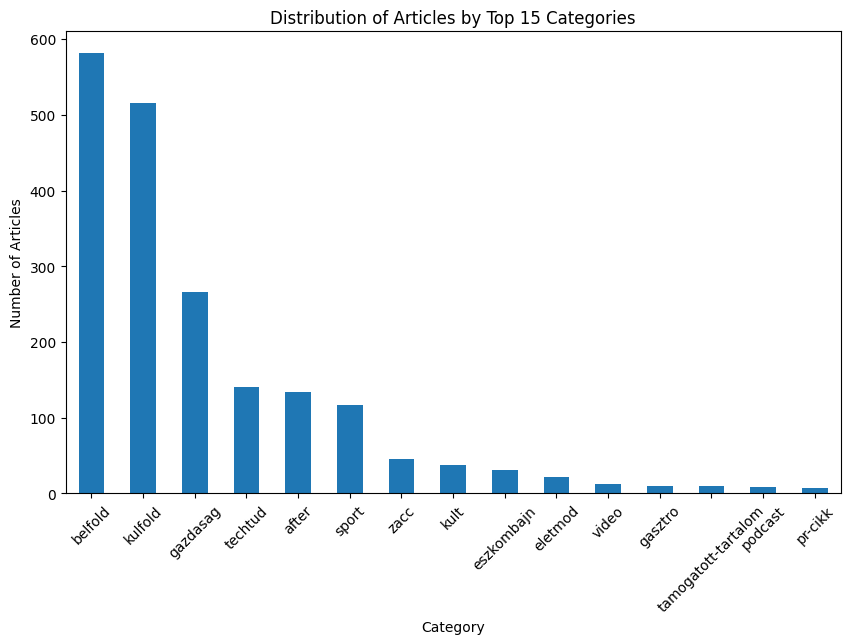

In [6]:
plt.figure(figsize=(10, 6))
df['category'].value_counts().nlargest(15).plot(kind='bar')
plt.title('Distribution of Articles by Top 15 Categories')
plt.xlabel('Category')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.show()

## Plot the distribution of articles by date

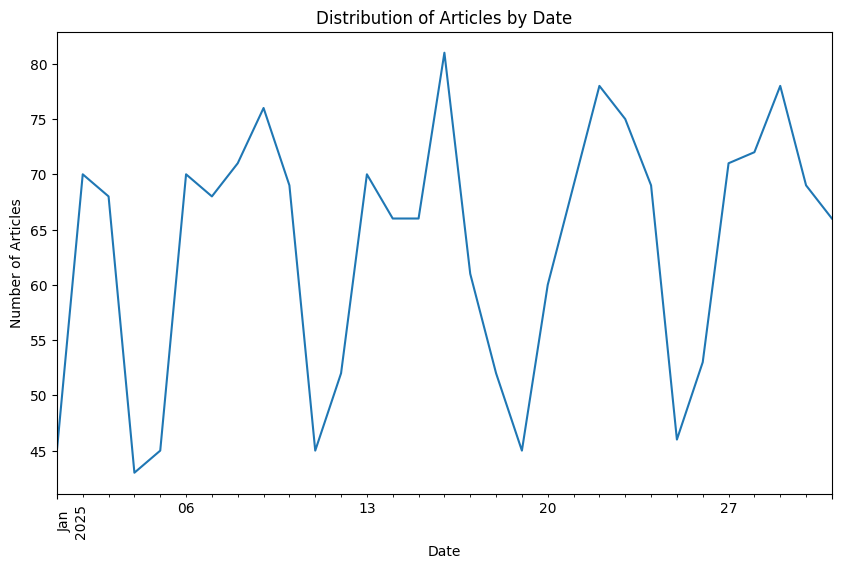

In [7]:
plt.figure(figsize=(10, 6))
df.set_index('date').resample('D').size().plot()
plt.title('Distribution of Articles by Date')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.xticks(rotation=90)
plt.show()

## Plot seasonal decomposition

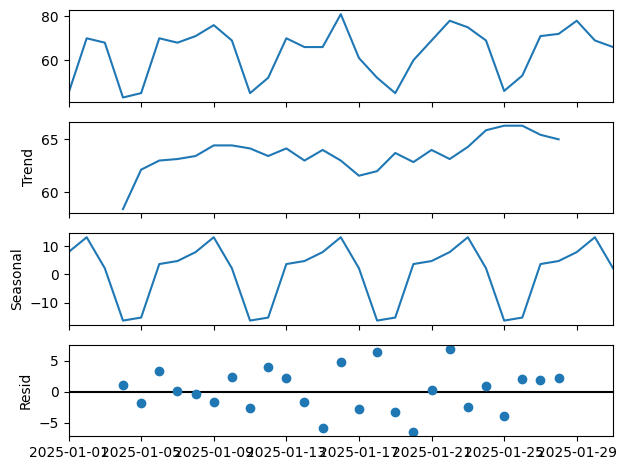

In [8]:
df_daily = df.set_index('date').resample('D').size()
result = seasonal_decompose(df_daily, model='additive', period=7)
result.plot()
plt.show()

## Plot articles by day of week

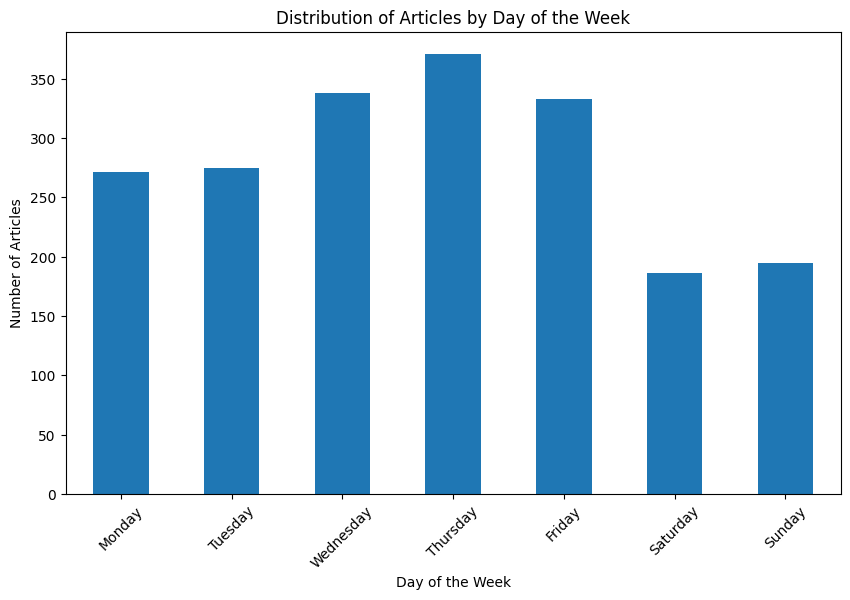

In [9]:
plt.figure(figsize=(10, 6))
df['day_of_week'] = df['date'].dt.day_name()
df['day_of_week'].value_counts().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']).plot(kind='bar')
plt.title('Distribution of Articles by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.show()